In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
oil = pd.read_csv('oil_sentiment.csv')
climate = pd.read_csv('climate_sentiment.csv')
price = pd.read_csv('all_commodities.csv')

In [9]:
oil

,date,oil_sentence_count,text,word_count,Stemd_text,Sentiments
0,1982-06-09,3,stark gash border separates german people,15,stark gash border separ german peopl,-0.100
1,1982-06-09,3,economic energy vastly exceeds adversaries,9,econom energi vastli exce adversari,0.000
2,1982-06-09,3,soil germany every ally vital concern member a...,19,soil germani everi alli vital concern member a...,0.100
3,2022-03-01,13,tonight announce united states worked 30 count...,26,tonight announc unit state work 30 countri rel...,0.000
4,2022-03-01,13,tonight announce united states worked 30 count...,26,tonight announc unit state work 30 countri rel...,0.000
...,...,...,...,...,...,...
1684,1976-09-23,34,another issue campaign governor carter endorse...,24,anoth issu campaign governor carter endors dem...,0.000
1685,2002-06-01,1,advancing nation pursue economic reform unleas...,16,advanc nation pursu econom reform unleash grea...,0.800
1686,1997-01-20,2,turmoil triumph promise exploded onto world st...,18,turmoil triumph promis explod onto world stage...,0.000
1687,1997-01-20,2,fuel fanaticism terror,6,fuel fanatic terror,-0.300


In [3]:
oil_price = price[price['Commodity'] == 'West Texas Intermediary Crude Oil']
oil_price.drop(['Unit', 'Commodity', 'Commodity_Simple'], axis=1, inplace=True)

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_4115/568171570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_price.drop(['Unit', 'Commodity', 'Commodity_Simple'], axis=1, inplace=True)


In [4]:
oil_price['Date_Time'] = pd.to_datetime(oil_price['Date_Time'])
oil_price.set_index('Date_Time', inplace=True)
oil_price

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_4115/3093365293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_price['Date_Time'] = pd.to_datetime(oil_price['Date_Time'])


,Value
Date_Time,
2024-01-22,75.26
2024-01-19,73.69
2024-01-18,74.32
2024-01-17,72.79
2024-01-16,72.63
...,...
1986-01-08,25.87
1986-01-07,25.85
1986-01-06,26.53


In [5]:
oil.drop(['text', 'Stemd_text'], axis=1, inplace=True)

In [6]:
climate.drop(['text', 'Stemd_text'], axis=1, inplace=True)

In [7]:
oil['sentiment_abs'] = oil['Sentiments'].abs()
climate['sentiment_abs'] = climate['Sentiments'].abs()

oil['max_sentiment'] = oil.groupby('date')['sentiment_abs'].transform('max')
climate['max_sentiment'] = climate.groupby('date')['sentiment_abs'].transform('max')

In [8]:
# for each date, take the average sentence count and word count, but for sentiment take the max value

oil_new = oil.groupby('date').mean()
climate_new = climate.groupby('date').mean()

In [9]:
oil_new.index = pd.to_datetime(oil_new.index)

climate_new.index = pd.to_datetime(climate_new.index)

In [10]:
oil_new_s = oil_new.resample('D').mean()
oil_new_s = oil_new_s.interpolate(method='spline', order=2)
oil_new_s

,oil_sentence_count,word_count,Sentiments,sentiment_abs,max_sentiment
date,,,,,
1974-01-30,21.000000,35.047619,0.032619,0.094429,0.312000
1974-01-31,21.846154,35.366002,0.033557,0.094511,0.326923
1974-02-01,22.692308,35.684385,0.034495,0.094594,0.341846
1974-02-02,23.538462,36.002769,0.035432,0.094677,0.356769
1974-02-03,24.384615,36.321152,0.036370,0.094760,0.371692
...,...,...,...,...,...
2024-03-03,1.971223,126.582734,0.109809,0.109809,0.150115
2024-03-04,1.978417,126.187050,0.110482,0.110482,0.151086
2024-03-05,1.985612,125.791367,0.111155,0.111155,0.152058


In [11]:
climate_new_s = climate_new.resample('D').mean()
climate_new_s = climate_new_s.interpolate(method='spline', order = 2)

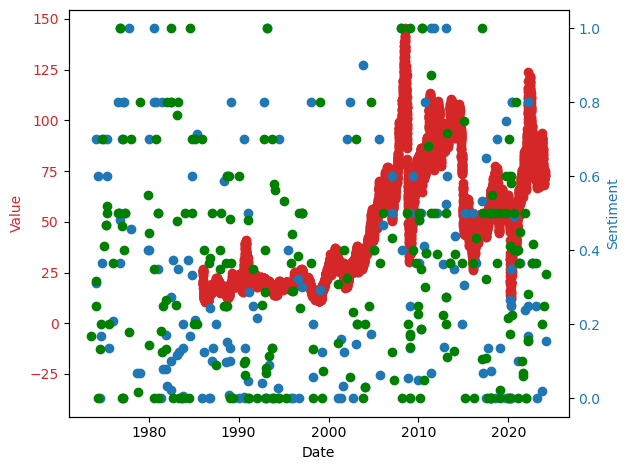

In [13]:
# plot oil prices with climate sentiment
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Value', color=color)
ax1.scatter(oil_price.index, oil_price['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Sentiment', color=color)
ax2.scatter(oil_new.index, oil_new['max_sentiment'], color=color)
ax2.scatter(climate_new.index, climate_new['max_sentiment'], color = 'green')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [14]:
oil_price_resample = oil_price.resample('D').mean()
oil_price_resample = oil_price_resample.interpolate()

In [15]:
# find correlation between oil price and oil sentiment
oil_new_s = oil_new_s[oil_new_s.index.isin(oil_price_resample.index)]
correlation_oil = oil_price_resample['Value'].corr(oil_new_s['max_sentiment'])

climate_new_s = climate_new_s[climate_new_s.index.isin(oil_price_resample.index)]
correlation_climate = oil_price_resample['Value'].corr(climate_new_s['max_sentiment'])

correlation_oil, correlation_climate

(0.24405038375505614, 0.15057595658481168)

In [16]:
from LinearModel import *

In [25]:
# get percent change in oil price
oil_price_resample['percent_change'] = oil_price_resample['Value'].pct_change()
oil_price_resample = oil_price_resample.interpolate()

# create a new column with oil price shifted one day back
oil_price_resample['Value_shifted'] = oil_price_resample['Value'].shift(1)
oil_price_resample = oil_price_resample.dropna()

In [26]:
# join oil and climate data
oil_new_s.index = pd.to_datetime(oil_new_s.index)
climate_new_s.index = pd.to_datetime(climate_new_s.index)

joined = oil_new_s.join(climate_new_s, lsuffix='_oil', rsuffix='_climate')
joined = joined.interpolate()

joined.head()

,oil_sentence_count,word_count_oil,Sentiments_oil,sentiment_abs_oil,max_sentiment_oil,climate_sentence_count,word_count_climate,Sentiments_climate,sentiment_abs_climate,max_sentiment_climate
date,,,,,,,,,,
1986-01-02,1.560000,37.160000,0.070000,0.070000,0.070000,5.96,20.760000,0.166440,0.197560,0.532
1986-01-03,1.573333,37.306667,0.071667,0.071667,0.071667,5.84,20.691515,0.167457,0.197634,0.528
1986-01-04,1.586667,37.453333,0.073333,0.073333,0.073333,5.72,20.623030,0.168474,0.197708,0.524
1986-01-05,1.600000,37.600000,0.075000,0.075000,0.075000,5.60,20.554545,0.169491,0.197782,0.520
1986-01-06,1.613333,37.746667,0.076667,0.076667,0.076667,5.48,20.486061,0.170508,0.197856,0.516


In [27]:
# join the joined data with previous day oil price and current day oil price
joined = joined.join(oil_price_resample, rsuffix='_price')
joined = joined.interpolate() # we should have all the data, but interpolate just in case
joined = joined.dropna()

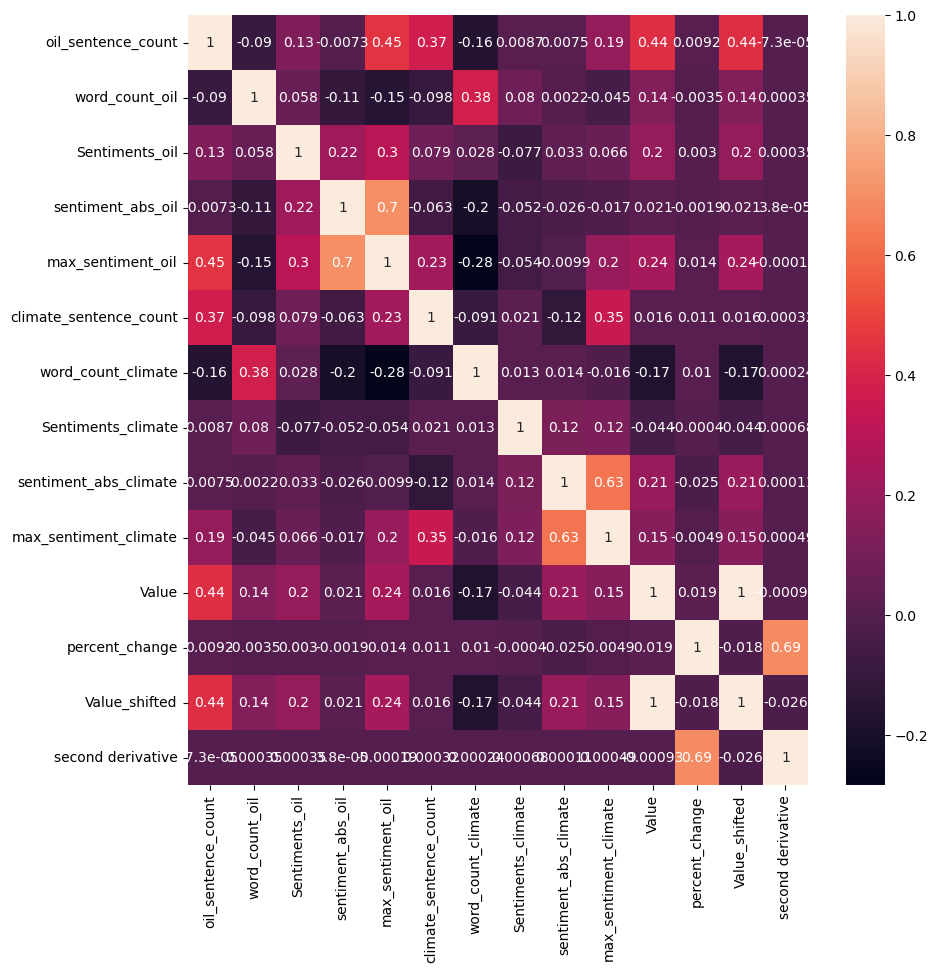

In [29]:
# find correlation matrix of joined
correlation_matrix = joined.corr()

# plot
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [27]:
joined['time'] = np.arange(len(joined))
joined['oil_mag'] = joined['oil_sentence_count'] * joined['max_sentiment_oil']
joined['climate_mag'] = joined['climate_sentence_count'] * joined['max_sentiment_climate']

In [40]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Assuming 'train_data' contains both the time series data and additional features
# 'features' should be a DataFrame containing the additional features
# 'target' should be a Series containing the target variable

data = joined[['max_sentiment_oil', 'max_sentiment_climate', 'Value', 'Consumption (quadrillion Btu)']]

# Fit the VAR model
model = VAR(X)

# Specify the lag order (number of lag observations to include in the model)
# You may need to choose an appropriate lag order based on the characteristics of your data
# You can use information criteria (e.g., AIC, BIC) or domain knowledge to select the lag order
lag_order = 2

# Fit the VAR model with the specified lag order
fitted_model = model.fit(lag_order)

# Optionally, you can print a summary of the model
print(fitted_model.summary())

# Make predictions on the test set
# 'test_data' should contain the same columns as 'train_data' (including the target variable)
# For example, predicting the next 10 time steps
forecast = fitted_model.forecast(X.values, steps=10)

print(forecast)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 06, Apr, 2024
Time:                     12:11:21
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -32.7996
Nobs:                     13394.0    HQIC:                  -32.8130
Log likelihood:           143809.    FPE:                5.57896e-15
AIC:                     -32.8198    Det(Omega_mle):     5.56399e-15
--------------------------------------------------------------------
Results for equation max_sentiment_oil
                                      coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------
const                                    0.000291         0.001286            0.226           0.821
L1.max_sentiment_oil                     1.424671         0.008171      

In [41]:
data

,max_sentiment_oil,max_sentiment_climate,Value,Consumption (quadrillion Btu)
date,,,,
1987-05-21,0.185920,0.157162,18.450000,2.595608
1987-05-22,0.186560,0.154154,18.550000,2.600197
1987-05-23,0.187200,0.151147,18.566667,2.604786
1987-05-24,0.187840,0.148140,18.583333,2.609374
1987-05-25,0.188480,0.145132,18.600000,2.613963
...,...,...,...,...
2024-01-18,0.106410,0.268242,81.040000,3.471397
2024-01-19,0.107381,0.269645,80.710000,3.471397
2024-01-20,0.108353,0.271048,81.040000,3.471397


In [44]:
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import TimeSeriesSplit

# Assuming 'data' is your DataFrame with time series data and additional features
# 'target_variable' should be the name of your target variable column
# 'features' should be a list of column names for additional features

# Separate features and target variable
features = data.drop(columns=['Value'])
target = data['Value']

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Fit the VAR model and perform time series cross-validation
for train_index, test_index in tscv.split(data):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]
    
    # Fit the VAR model
    model = VAR(train_data)
    fitted_model = model.fit(30)  # Assuming lag order of 2
    
    # Make predictions on the test set
    forecast = fitted_model.forecast(train_data.values, steps=len(test_data))
    
    # Calculate RMSE (Root Mean Squared Error) to evaluate model performance
    rmse = sqrt(mean_squared_error(test_data['Value'], forecast[:, -1]))
    print('RMSE:', rmse)


RMSE: 14.383216574794615
RMSE: 30.24537319816699
RMSE: 79.8383395988235
RMSE: 81.97084371344019
RMSE: 71.47115744256723


In [ ]:
# use the model to graph the predictions

forecast = fitted_model.forecast(data.iloc[:30].values, steps=len(data)-30)
f = pd.DataFrame(forecast, columns=['max_sentiment_oil', 'max_sentiment_climate', 'Value', 'Consumption (quadrillion Btu)'])

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Value'], label='Actual')
plt.plot(data.index[30:], f['Value'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_984/790179778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['max_sentiment_oil'] = np.exp(X['max_sentiment_oil'])
/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_984/790179778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['max_sentiment_climate'] = np.exp(X['max_sentiment_climate'])


The p-value for the F-test is: 0.0.
The model is statistically significant.


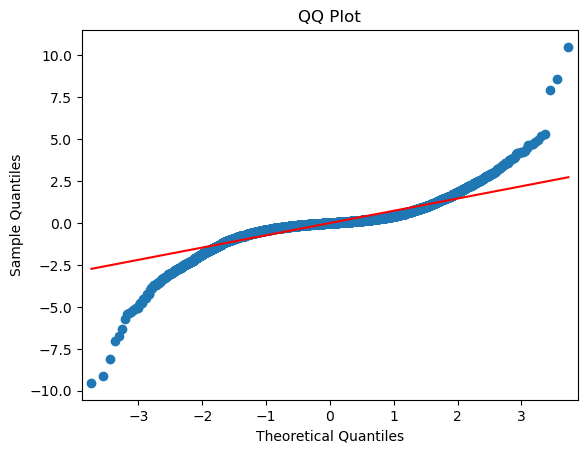

The null hypothesis for the Jarque-Bera test is normality.
{'Jarque-Bera': 123338.24130487812, 'Chi^2 two-tail prob.': 0.0, 'Skew': -0.27133439864929426, 'Kurtosis': 19.611410949863906}


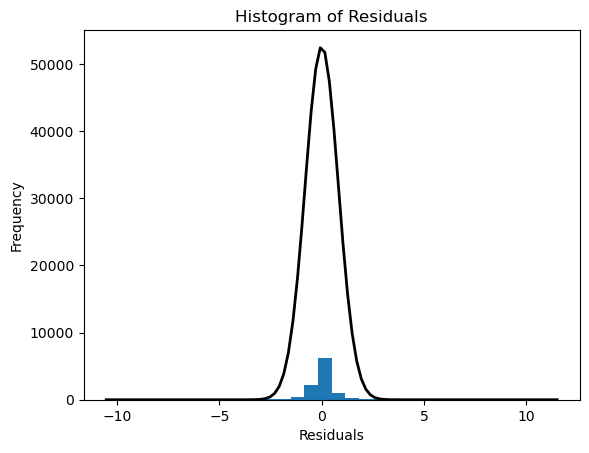

The residuals are not normally distributed.
The null hypothesis for the Breusch-Pagan test is homoscedasticity.
{'Lagrange multiplier statistic': 548.0180968484949, 'p-value': 2.7461816517009077e-117, 'f-value': 144.3212107194278, 'f p-value': 2.2119511732705277e-120}


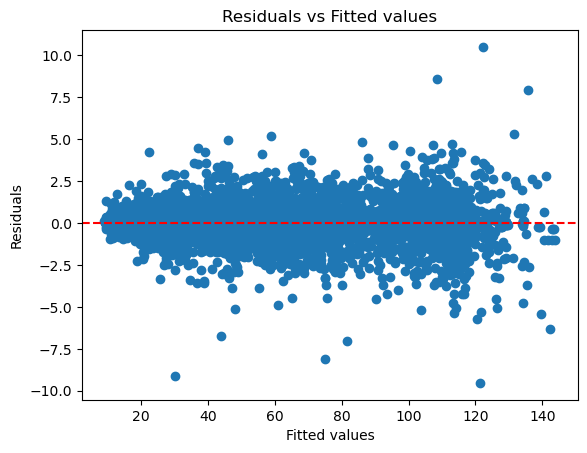

The residuals are heteroscedastic.
The null hypothesis for the Durbin-Watson test is no autocorrelation.
{'Durbin-Watson': 1.8400783515605945, 'p-value': 0.0657567350708328}


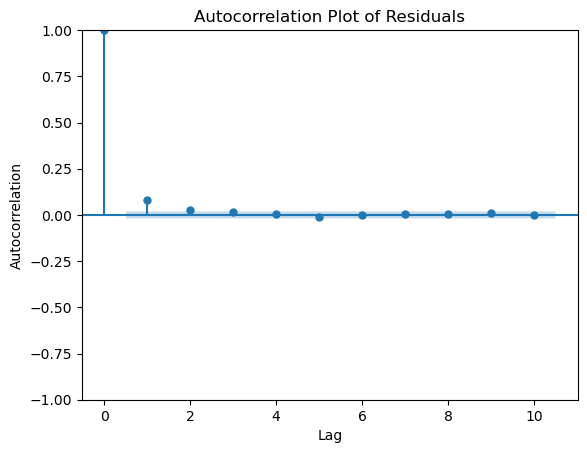

The residuals are not autocorrelated.
The correlation matrix is:


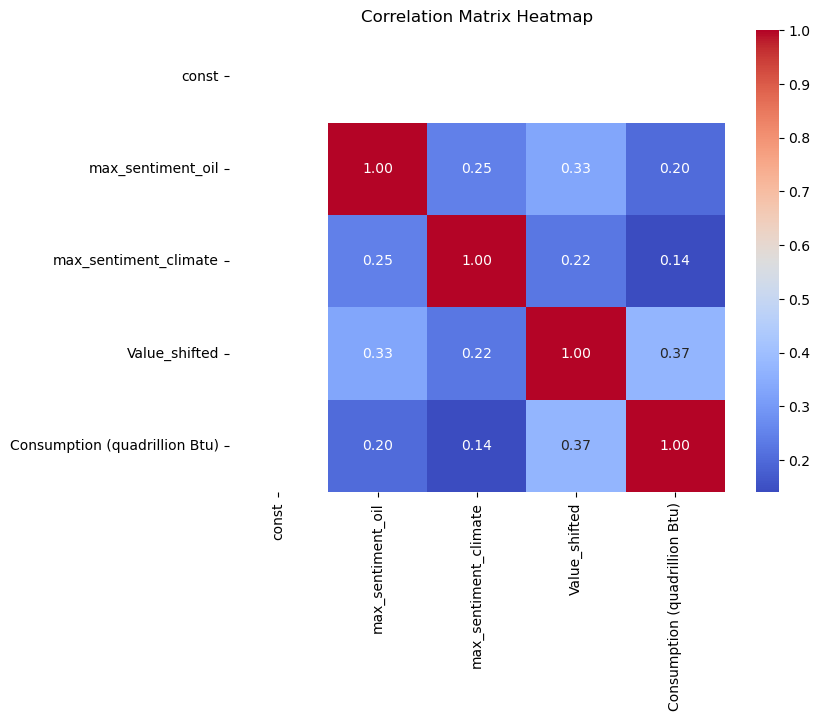

                        Variable         VIF
0                          const  255.033778
1              max_sentiment_oil    1.170536
2          max_sentiment_climate    1.093876
3                  Value_shifted    1.279320
4  Consumption (quadrillion Btu)    1.169969
There is multicollinearity in the model.
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.673e+06
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:02:46   Log-Likelihood:                -12976.
No. Observations:               10716   AIC:                         2.596e+04
Df Residuals:                   10711   BIC:                         2.600e+04
Df Model:                           4                    

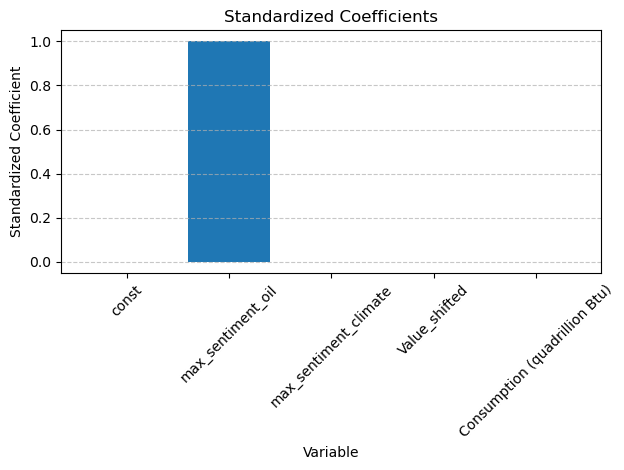

In [35]:
# create model that predicts consumption based on oil price and sentiments
X = joined[['max_sentiment_oil', 'max_sentiment_climate', 'Value_shifted', 'Consumption (quadrillion Btu)']]
X['max_sentiment_oil'] = np.exp(X['max_sentiment_oil'])
X['max_sentiment_climate'] = np.exp(X['max_sentiment_climate'])
y = joined['Value']

# train test split
X_train = X[:int(0.8 * len(X))]
y_train = y[:int(0.8 * len(y))]
X_test = X[int(0.8 * len(X)):]
y_test = y[int(0.8 * len(y)):]

model = test_linear_model(X_train, y_train)

In [184]:
def simulate_oil(model, X, y, variability = 0, lower_bound = 15, lower_bound_growth_rate = None, plot = False):
    y_pred = y.copy()
    X_copy = X.copy()


    for i in range(len(y)):
        if i == 0:
            y_pred[i] = y[i]
        else:
            X_copy.iloc[i]['Value_shifted'] = y_pred[i - 1]
            
            X_pred_copy = X_copy.iloc[i]
            X_pred_copy = X_pred_copy.to_frame().T
            X_pred_copy['const'] = 1
            #reorder columns
            X_pred_copy = X_pred_copy[['const', 'max_sentiment_oil', 'max_sentiment_climate', 'Value_shifted', 'Consumption (quadrillion Btu)']]
            
            if variability == 0:
                pred = model.predict(X_pred_copy)
                y_pred[i] = pred
                
            else:
                pred = model.predict(X_pred_copy) + np.random.normal(0, variability)
                if lower_bound_growth_rate:
                    while float(pred) < lower_bound + lower_bound_growth_rate/365:
                        pred = 15+i/365
                    y_pred[i] = pred
                else:
                    while float(pred) < lower_bound:
                        pred = model.predict(X_pred_copy) + np.random.normal(0, variability)
                    y_pred[i] = pred

    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(y.index, y, label='actual')
        plt.plot(y.index, y_pred, label='stochastic prediction')
        plt.title('Oil Price Simulation')
        plt.legend()
    
    return y_pred

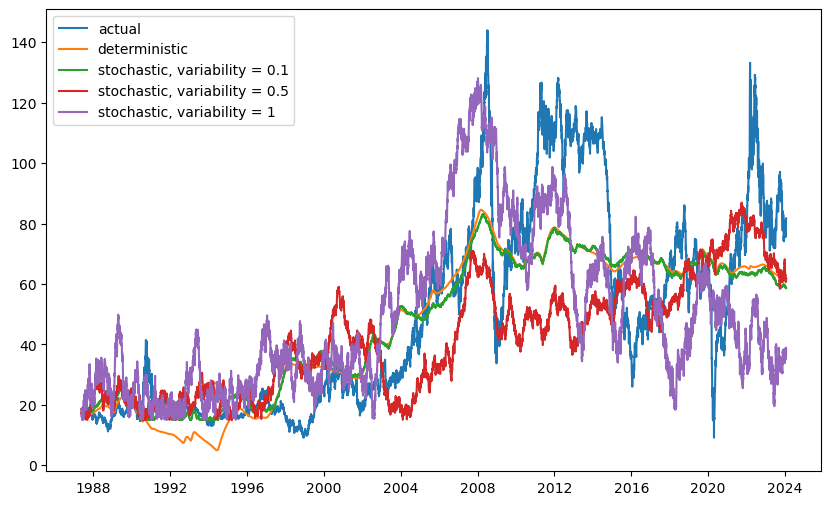

In [185]:
y_deterministic = simulate_oil(model, X, y, 0)
y_stoch_01 = simulate_oil(model, X, y, 0.1)
y_stoch_05 = simulate_oil(model, X, y, 0.5)
y_stoch_1 = simulate_oil(model, X, y, 1)

plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='actual')
plt.plot(y.index, y_deterministic, label='deterministic')
plt.plot(y.index, y_stoch_01, label='stochastic, variability = 0.1', alpha=0.5)
plt.plot(y.index, y_stoch_05, label='stochastic, variability = 0.5', alpha=0.5)
plt.plot(y.index, y_stoch_1, label='stochastic, variability = 1', alpha=0.5)
plt.legend()
plt.show()

In [31]:
simulations = pd.read_csv('oil_price_simulations.csv')

In [32]:
y = simulations['actual']
y_deterministic = simulations['deterministic']
y_stoch_01 = simulations['stochastic_01']
y_stoch_05 = simulations['stochastic_05']
y_stoch_1 = simulations['stochastic_1']
simulations['date'] = pd.to_datetime(simulations['date'])

In [36]:
joined.sort_index

<bound method DataFrame.sort_index of             oil_sentence_count  word_count_oil  Sentiments_oil  \
date                                                             
1986-01-04            1.586667       37.453333        0.073333   
1986-01-05            1.600000       37.600000        0.075000   
1986-01-06            1.613333       37.746667        0.076667   
1986-01-07            1.626667       37.893333        0.078333   
1986-01-08            1.640000       38.040000        0.080000   
...                        ...             ...             ...   
2024-01-18            1.647482      144.388489        0.079540   
2024-01-19            1.654676      143.992806        0.080212   
2024-01-20            1.661871      143.597122        0.080885   
2024-01-21            1.669065      143.201439        0.081558   
2024-01-22            1.676259      142.805755        0.082230   

            sentiment_abs_oil  max_sentiment_oil  climate_sentence_count  \
date                       

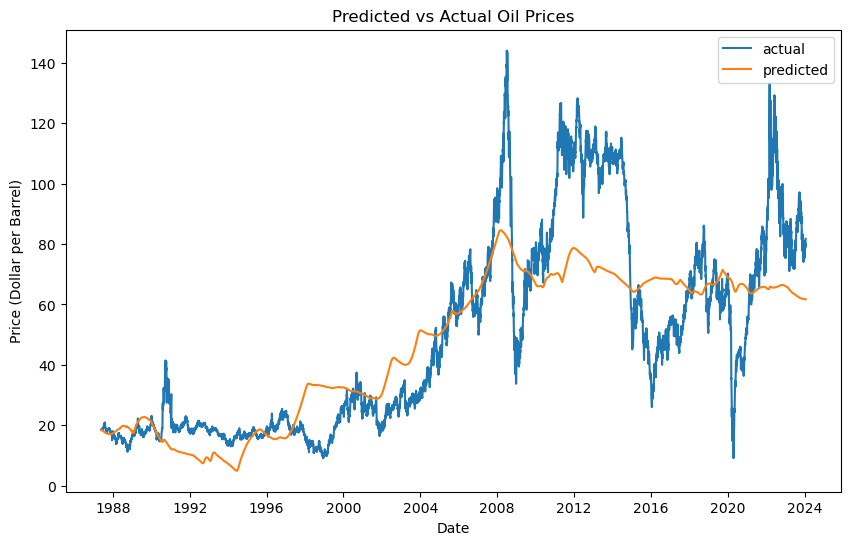

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(simulations['date'], y, label='actual')
plt.plot(simulations['date'], y_deterministic, label='predicted')
plt.legend()
plt.title('Predicted vs Actual Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (Dollar per Barrel)')
plt.show()

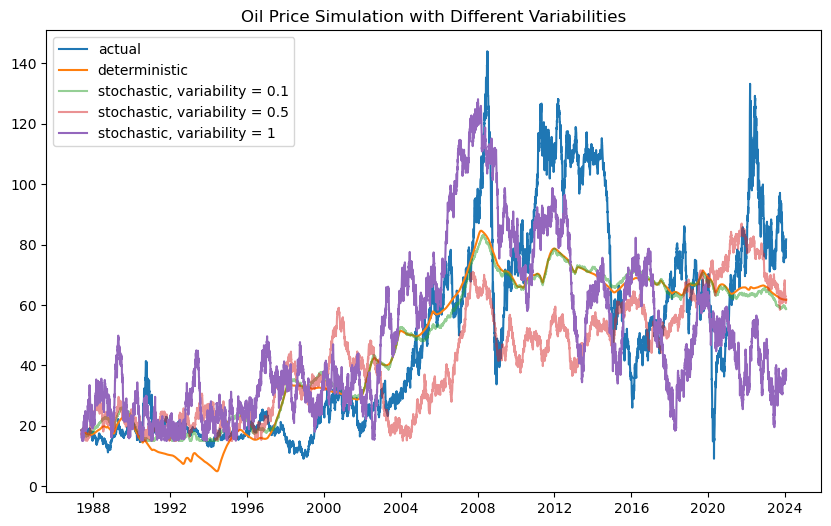

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(simulations['date'], y, label='actual')
plt.plot(simulations['date'], y_deterministic, label='deterministic')
plt.plot(simulations['date'], y_stoch_01, label='stochastic, variability = 0.1', alpha=0.5)
plt.plot(simulations['date'], y_stoch_05, label='stochastic, variability = 0.5', alpha=0.5)
plt.plot(simulations['date'], y_stoch_1, label='stochastic, variability = 1')
plt.legend()
plt.title('Oil Price Simulation with Different Variabilities')
plt.show()

In [188]:
# combine the five simulations into a dataframe
simulations = pd.DataFrame({'actual': y, 'deterministic': y_deterministic, 'stochastic_01': y_stoch_01, 'stochastic_05': y_stoch_05, 'stochastic_1': y_stoch_1})
simulations.to_csv('oil_price_simulations.csv')

In [28]:
# plot consumption level of oil versus oil price
emicom = pd.read_csv('emi_com.csv')
emicom

,Unnamed: 0,level_0,index,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,0,0,18749,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
1,5669,5669,5918,1973-01-01,0.149684,Total,Petroleum,Industrial,42.325,282.762039
2,5670,5670,4696,1973-01-01,0.193211,Total,Petroleum,Commercial,17.412,90.118908
3,5671,5671,1222,1973-01-01,0.390419,Total,Petroleum,Residential,31.236,80.006442
4,5672,5672,16305,1973-01-01,0.262598,Total,Petroleum,Electric Power,26.223,99.859750
...,...,...,...,...,...,...,...,...,...,...
9328,5662,5662,21384,2023-11-01,0.023901,Coal,Coal,Industrial,7.254,303.496793
9329,5663,5663,20593,2023-11-01,0.000696,Coal,Coal,Commercial,0.124,178.156477
9330,5664,5664,20592,2023-11-01,0.000672,Coal,Coal,Commercial,0.124,184.613675
9331,9331,9331,7138,2023-11-01,0.461447,Total,Petroleum,Industrial,30.972,67.119335


**Emission Analysis**

In [29]:
emicom = emicom.drop(['Unnamed: 0', 'level_0', 'index', 'Energy Type'], axis=1)

In [30]:
emicom['Date'] = pd.to_datetime(emicom['Date'])
oil_consumption = emicom[emicom['Energy Class'] == 'Petroleum']

In [31]:
oil_consumption = oil_consumption.groupby('Date').sum()
oil_consumption = oil_consumption.resample('D').mean()
oil_consumption = oil_consumption.interpolate()
oil_consumption['Emission per Consumption'] = oil_consumption['Emission (Mton Co2)'] / oil_consumption['Consumption (quadrillion Btu)']

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_984/3461493595.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oil_consumption = oil_consumption.groupby('Date').sum()


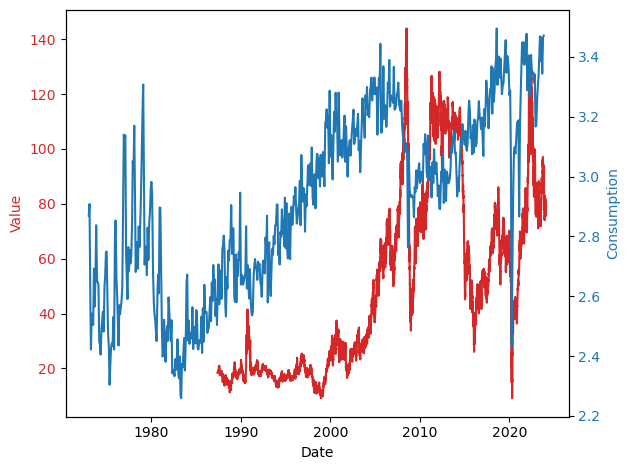

In [32]:
# plot oil consumption vs oil price in the same graph
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Value', color=color)
ax1.plot(joined.index, joined['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Consumption', color=color)
ax2.plot(oil_consumption.index, oil_consumption['Consumption (quadrillion Btu)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [33]:
# find correlation between 1/oil consumption and oil price

oil_consumption['inverse_consumption'] = 1 / oil_consumption['Consumption (quadrillion Btu)']
correlation_consumption = oil_consumption['inverse_consumption'].corr(joined['Value'])
correlation_consumption

-0.47338741996199896

In [34]:
# join oil consumption with joined
joined = joined.join(oil_consumption, rsuffix='_consumption')
joined = joined.interpolate()
joined = joined.dropna()

In [68]:
# column for shifted oil consumption
joined['consumption_shifted'] = joined['Consumption (quadrillion Btu)'].shift(1)
joined = joined.dropna()

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_984/3086660317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['max_sentiment_oil'] = np.exp(X['max_sentiment_oil'])
/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_984/3086660317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['max_sentiment_climate'] = np.exp(X['max_sentiment_climate'])


The p-value for the F-test is: 0.0.
The model is statistically significant.


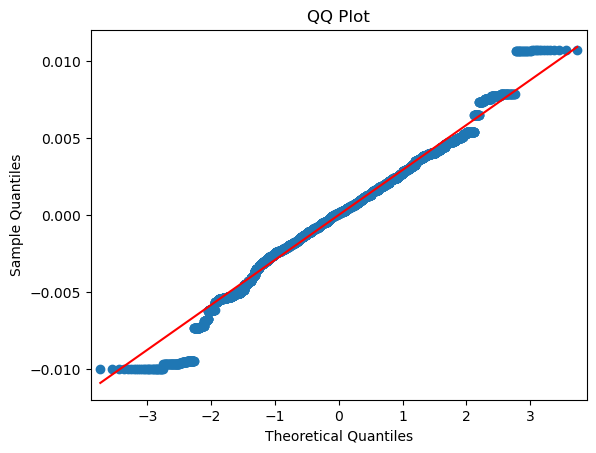

The null hypothesis for the Jarque-Bera test is normality.
{'Jarque-Bera': 623.4597689642534, 'Chi^2 two-tail prob.': 4.144110480953469e-136, 'Skew': -0.2524262088181216, 'Kurtosis': 4.068386871246333}


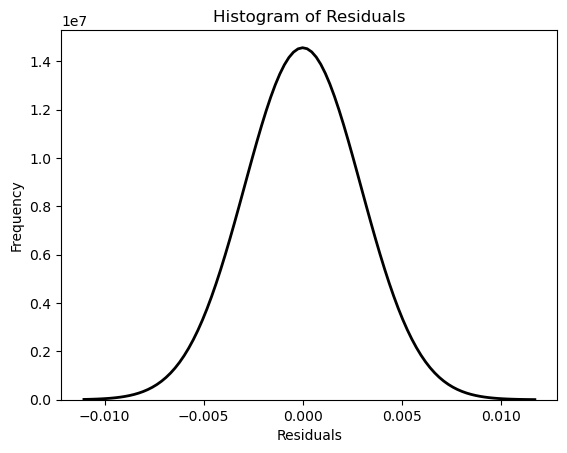

The residuals are not normally distributed.
The null hypothesis for the Breusch-Pagan test is homoscedasticity.
{'Lagrange multiplier statistic': 99.3422934441548, 'p-value': 1.3578625217932637e-20, 'f-value': 25.05626851902922, 'f p-value': 1.1019356981126143e-20}


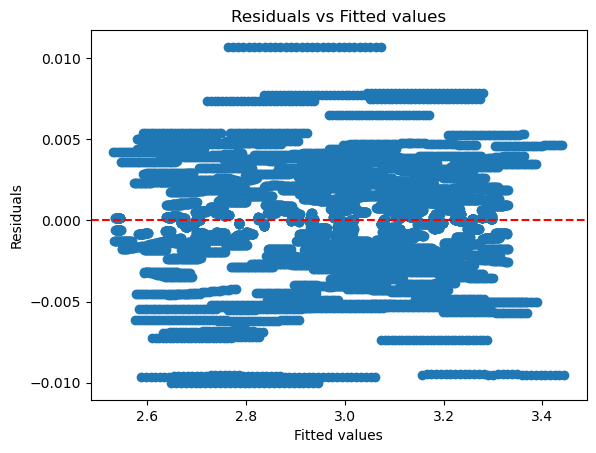

The residuals are heteroscedastic.
The null hypothesis for the Durbin-Watson test is no autocorrelation.
{'Durbin-Watson': 0.0975788912574377, 'p-value': 0.922266686837049}


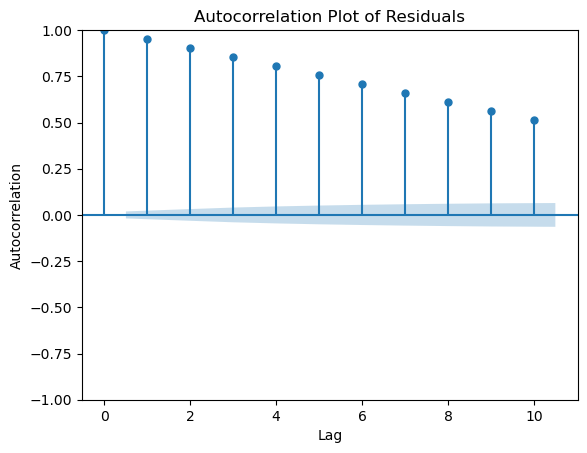

The residuals are not autocorrelated.
The correlation matrix is:


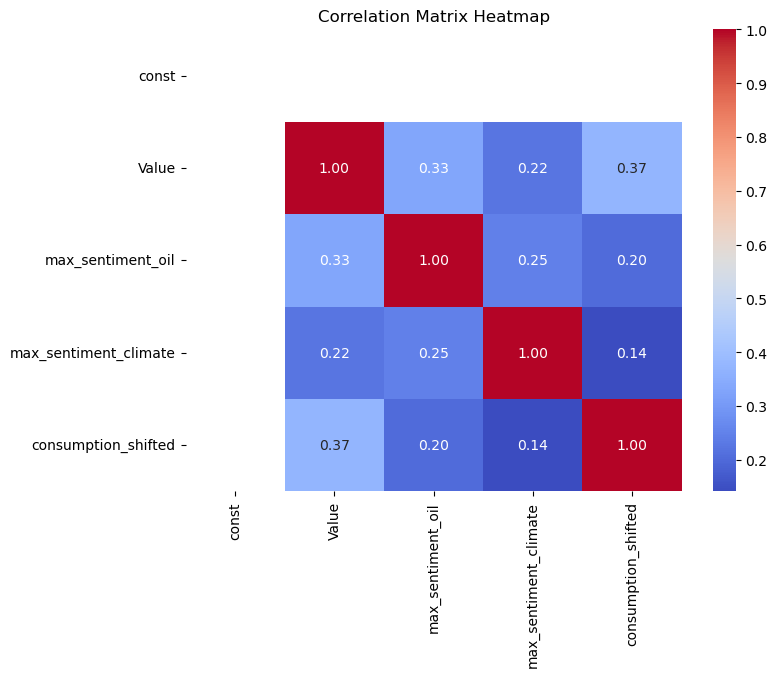

                Variable         VIF
0                  const  255.043392
1                  Value    1.280121
2      max_sentiment_oil    1.171005
3  max_sentiment_climate    1.093834
4    consumption_shifted    1.170647
There is multicollinearity in the model.
                                  OLS Regression Results                                 
Dep. Variable:     Consumption (quadrillion Btu)   R-squared:                       1.000
Model:                                       OLS   Adj. R-squared:                  1.000
Method:                            Least Squares   F-statistic:                 1.276e+07
Date:                           Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                                   13:47:00   Log-Likelihood:                 47273.
No. Observations:                          10716   AIC:                        -9.454e+04
Df Residuals:                              10711   BIC:                        -9.450e+04
Df Model:        

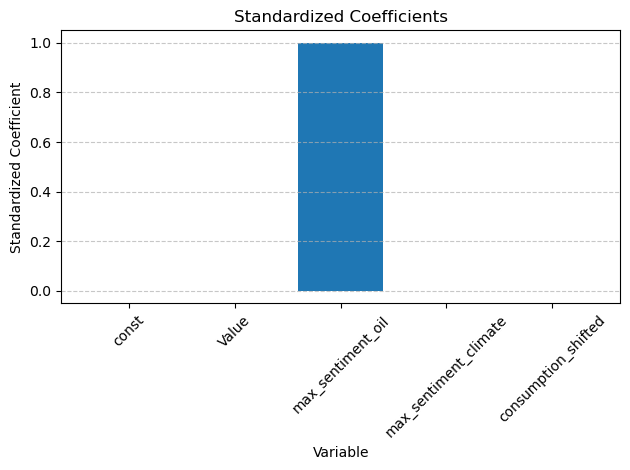

In [69]:
# create model that predicts consumption based on oil price and sentiments
X = joined[['Value', 'max_sentiment_oil', 'max_sentiment_climate', 'consumption_shifted']]
X['max_sentiment_oil'] = np.exp(X['max_sentiment_oil'])
X['max_sentiment_climate'] = np.exp(X['max_sentiment_climate'])
y = joined['Consumption (quadrillion Btu)']

# train test split
X_train = X[:int(0.8 * len(X))]
y_train = y[:int(0.8 * len(y))]
X_test = X[int(0.8 * len(X)):]
y_test = y[int(0.8 * len(y)):]

model = test_linear_model(X_train, y_train)

In [117]:
def simulate_oil_c(model, X, y, variability = 0, lower_bound = 2, lower_bound_growth_rate = 1e-5, plot = False):
    y_pred = y.copy()
    X_copy = X.copy()


    for i in range(len(y)):
        if i == 0:
            y_pred[i] = y[i]
        else:
            X_copy.iloc[i]['consumption_shifted'] = y_pred[i - 1]
            
            X_pred_copy = X_copy.iloc[i]
            X_pred_copy = X_pred_copy.to_frame().T
            X_pred_copy['const'] = 1
            #reorder columns
            X_pred_copy = X_pred_copy[['const', 'Value', 'max_sentiment_oil', 'max_sentiment_climate', 'consumption_shifted']]
            
            if variability == 0:
                pred = model.predict(X_pred_copy)
                y_pred[i] = pred
                
            else:
                pred = model.predict(X_pred_copy) + np.random.normal(0, variability)
                if lower_bound_growth_rate:
                    while float(pred) < lower_bound + lower_bound_growth_rate:
                        pred = lower_bound + i*lower_bound_growth_rate
                    y_pred[i] = pred
                else:
                    while float(pred) < lower_bound:
                        pred = lower_bound
                    y_pred[i] = pred

    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(y.index, y, label='actual')
        plt.plot(y.index, y_pred, label='prediction')
        plt.title('Oil Price Simulation')
        plt.legend()
    
    return y_pred

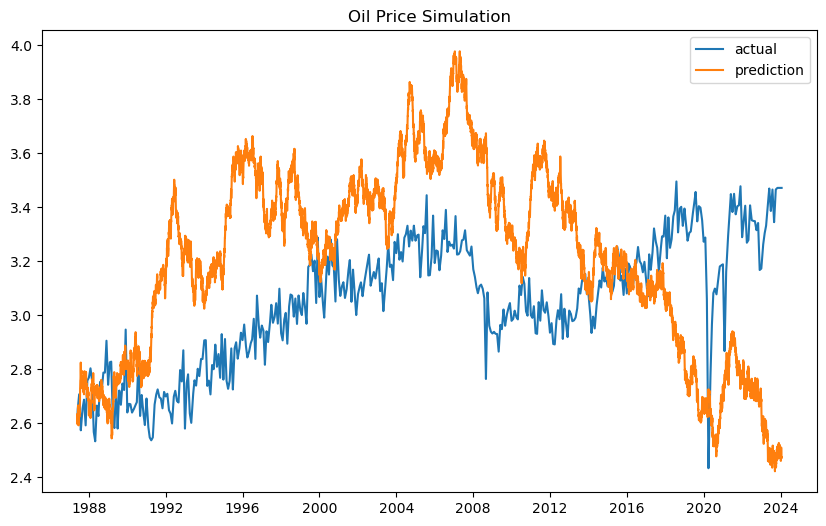

In [120]:
y_stoch_1_c = simulate_oil_c(model, X, y, 0.01, plot=True)

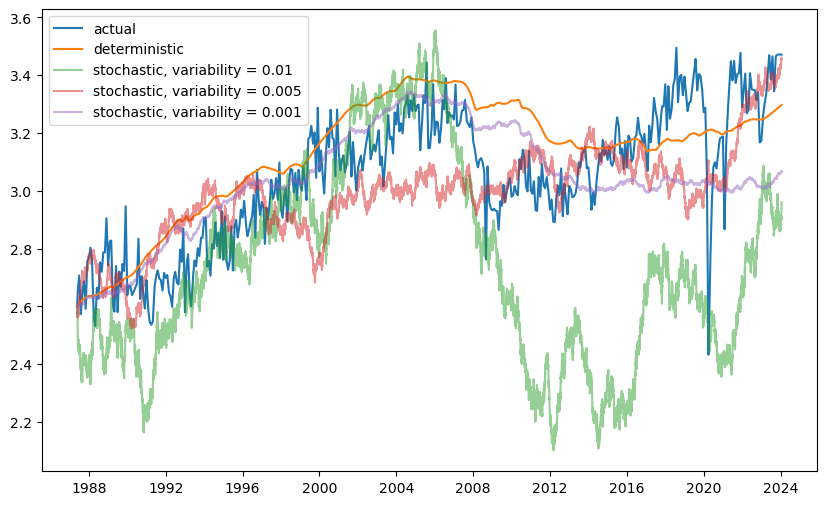

In [122]:
y_deterministic_c = simulate_oil_c(model, X, y, 0)
y_stoch_01_c = simulate_oil_c(model, X, y, 0.01)
y_stoch_05_c = simulate_oil_c(model, X, y, 0.005)
y_stoch_1_c = simulate_oil_c(model, X, y, 0.001)

plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='actual')
plt.plot(y.index, y_deterministic_c, label='deterministic')
plt.plot(y.index, y_stoch_01_c, label='stochastic, variability = 0.01', alpha=0.5)
plt.plot(y.index, y_stoch_05_c, label='stochastic, variability = 0.005', alpha=0.5)
plt.plot(y.index, y_stoch_1_c, label='stochastic, variability = 0.001', alpha=0.5)
plt.legend()
plt.show()

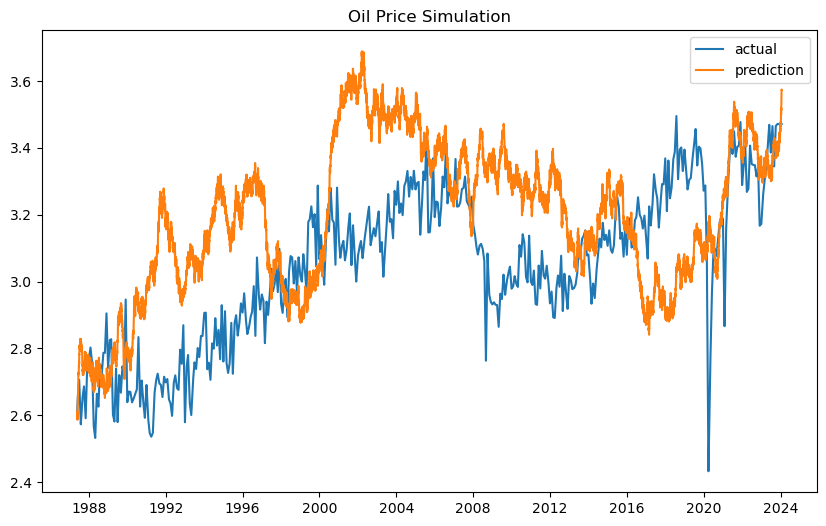

In [125]:
y_stoch_08_c = simulate_oil_c(model, X, y, 0.008, plot = True)

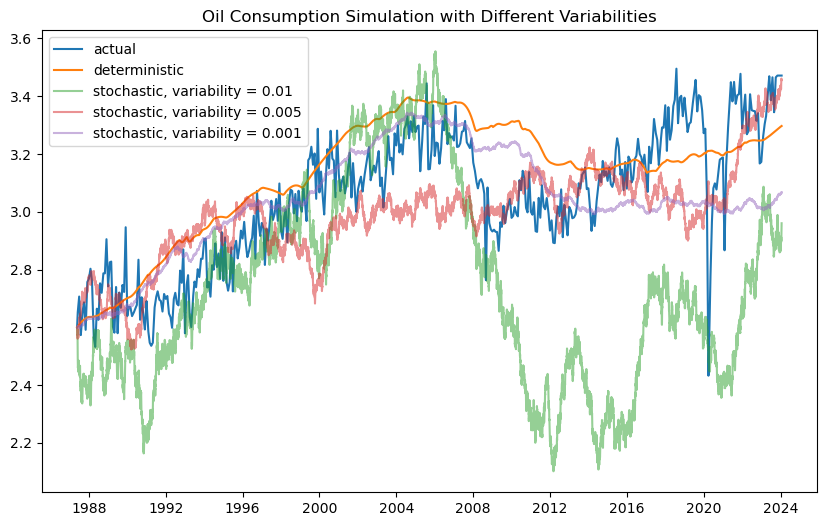

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='actual')
plt.plot(y.index, y_deterministic_c, label='deterministic')
plt.plot(y.index, y_stoch_01_c, label='stochastic, variability = 0.01', alpha=0.5)
plt.plot(y.index, y_stoch_05_c, label='stochastic, variability = 0.005', alpha=0.5)
plt.plot(y.index, y_stoch_1_c, label='stochastic, variability = 0.001', alpha=0.5)
plt.legend()
plt.title('Oil Consumption Simulation with Different Variabilities')
plt.show()